## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 11
---------------------------------------

GOALS:

1. Understand Causal vs Experimental Studies
2. Do a more free form data analysis
3. Start doing your ethics reading

----------------------------------------------------------

This homework has **2 questions**, **10 exercises** and **1 essay response**.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
file_name = 'data/yougov-climate.csv'
DF = pd.read_csv(file_name,index_col=0)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know
country,,,,,
GB,833,604,49,33,114
US,507,493,120,80,133


In [6]:
DF.loc['total']= DF.sum(axis=0)
DF['total'] = DF.sum(axis=1)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know,total
country,,,,,,
GB,833,604,49,33,114,1633
US,507,493,120,80,133,1333
total,1340,1097,169,113,247,2966


In [8]:
all_respondents = DF['total'].loc['total']
human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['total']
human_responsible/all_respondents

0.45178691840863117

In [10]:
gb_respondants = DF['total'].loc['GB']
GB_human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['GB']
GB_human_responsible/gb_respondants

0.5101041028781383

In [12]:
us_respondants = DF['total'].loc['US']
US_human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['US']
US_human_responsible/us_respondants

0.3803450862715679

In the lecture we analyzed the following questions for the first column in the data:

### First question:

What percent of **all respondents** think the climate is changing and human activity is mainly responsible?  

### Second question:

What percent of **GB respondents** think the climate is changing and  human activity is mainly responsible?  

### Third Question

What percent of **US respondents** think the climate is changing and  human activity is mainly responsible?  

**Q1** Repeat the analysis from the lecture notes for one of the other columns/questions.

1. Percent total
2. Percent from GB
3. Percent from US

Talk about the conditional probability in this case:

eg. In a person is from ________ then there is a ________ probability that they believe _______. If a person answered _______ then they are more likley to be from ________. 

1. 45.2% of all respondents thinks humans are mainly responsible for climate change
2. 51% of GB respondents think that humans are mainly responsible for  climate change
3. 38% of US respondents think that humans are mainly responsible for climate change
 If a person is from the US then there is a 38% probability that they believe humans are responsible for  climate change . If a person answered that humans are not responsible for  climate change  then they are more likley to be from the US.

## Berkeley admission data example

- Study carried out by the Graduate Division of the University of California, Berkeley in the early 70’s to evaluate whether there was a gender bias in graduate admissions.
- The data come from six departments. For confidentiality we'll call them A-F. 
- We have information on whether the applicant was male or female and whether they were admitted or rejected. This is an old study so only two binary classifications were used. 

### Here is the data


In [32]:
file_name = 'data/berkley.csv'
DF = pd.read_csv(file_name)
show(DF)

In [34]:
DF_melt = pd.melt(DF,id_vars=['Department'],var_name='MF',value_name='Number')
DF_melt

,Department,MF,Number
0,A,Male Yes,512
1,B,Male Yes,353
2,C,Male Yes,120
3,D,Male Yes,138
4,E,Male Yes,53
5,F,Male Yes,22
6,A,Male No,313
7,B,Male No,207
8,C,Male No,205
9,D,Male No,279


In [36]:
DF_melt['gender'] = DF_melt['MF'].apply(lambda x: x.split(' ')[0]).copy()
DF_melt['admitted'] = DF_melt['MF'].apply(lambda x: x.split(' ')[1]).copy()

In [38]:
DF_melt

,Department,MF,Number,gender,admitted
0,A,Male Yes,512,Male,Yes
1,B,Male Yes,353,Male,Yes
2,C,Male Yes,120,Male,Yes
3,D,Male Yes,138,Male,Yes
4,E,Male Yes,53,Male,Yes
5,F,Male Yes,22,Male,Yes
6,A,Male No,313,Male,No
7,B,Male No,207,Male,No
8,C,Male No,205,Male,No
9,D,Male No,279,Male,No


### Gender distribution by department

What can we say about the gender distribution if we look at the individual departments.

Start with our original "melted" data frame:

#### Lets pivot!

Pivot this data so that our departments become the column labels and our MF column becomes the index.

In [40]:
# Your code here
DF_dept = DF_melt.pivot(index='MF',columns='Department',values='Number')
DF_dept

Department,A,B,C,D,E,F
MF,,,,,,
Female No,19,8,391,244,299,317
Female Yes,89,17,202,131,94,24
Male No,313,207,205,279,138,351
Male Yes,512,353,120,138,53,22


**Q2** Calculate the proportions for the other departments. We did department A in the lecture. You can use the code from the lecture or come up with your own way to do this. You can do this one by one or try using a FOR loop.

Talk about what you see in these proportions. Which departments admit a large number of women? How do your number align with the visualization below?

In [44]:
# Your code here
prob_female = DF_dept['C']['Female Yes']/(DF_dept['C']['Female Yes']+DF_dept['C']['Female No'])
prob_male = DF_dept['C']['Male Yes']/(DF_dept['C']['Male Yes']+DF_dept['C']['Male No'])

In [48]:
prob_female

0.3406408094435076

In [50]:
prob_male

0.36923076923076925

Department A admitted the biggest proportion of females while Department 3 admitted the biggest number of females. my number alligns pretty well with the visualization since were basically calculating proportions. 

### Here is a plot of the proportions data

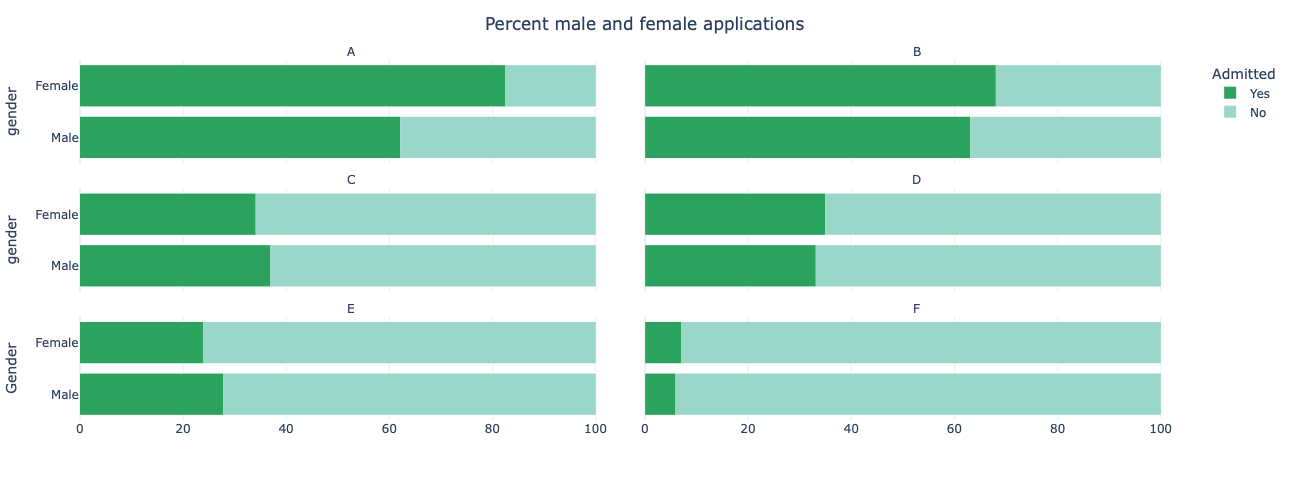

In [54]:
fig = px.histogram(DF_melt,
                   y='gender',
                   x='Number',
                   barnorm = "percent",
                   color='admitted',
                   facet_col='Department',
                   facet_col_wrap=2,
                   color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

------------------------
------------------------

## Homework - Exercises

** Homework content and data from Data Science in a Box - he-05-legos.Rmd

This week we'll do some data gymnastics to refresh and review what we learned over the past few weeks using (**simulated**) data from Lego sales in 2018 for a sample of customers who bought Legos in the US. This is different than the data we used on the Exam!


### Data

In [56]:
file_name = 'data/lego-sales.csv'
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


### Exercises

* Answer the following questions using reproducible Python code.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

-------------

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

In [71]:
DF.shape
##there are 14 variables and 620 observations

(620, 14)

In [92]:
DF['first_name'].value_counts().reset_index()
## the three most common names are Jackson, Joseph, Jacob

,first_name,count
0,Jackson,13
1,Joseph,11
2,Jacob,11
3,Michael,10
4,Kaitlyn,8
...,...,...
206,Gunnar,1
207,David,1
208,Lawrence,1
209,John'Dunae,1


In [96]:
DF['theme'].value_counts().reset_index()
##the three most common themes are star Wars, Nexo Knights, and Gear 

,theme,count
0,Star Wars,75
1,Nexo Knights,64
2,Gear,55
3,Mixels,55
4,City,45
5,Friends,42
6,Ninjago,38
7,Duplo,35
8,Bionicle,34
9,Creator,25


In [150]:
mask = (DF['theme'] == ('Star Wars')) | (DF['theme'] == ('Nexo Knights')) | (DF['theme'] == ('Gear'))
DF_new = DF[mask]
DF_new['subtheme'].value_counts().reset_index()
##the three most common subthemes among the three most common themes are Ultimate, The force Awakens and Buildable Figures

,subtheme,count
0,Ultimate,22
1,The Force Awakens,15
2,Buildable Figures,11
3,Episode V,10
4,MicroFighters,10
5,Battlefront,7
6,Role-Play toys,7
7,Stationery,7
8,Original Content,7
9,Episode III,6


In [165]:
mask1 = DF['age'] <= 18
DF[mask1].reset_index()

,index,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,44,Michelle,Uguccioni,17,NaN,24756,70310,Nexo Knights,NaN,2018,Knighton Battle Blaster,76.0,9.99,http://images.brickset.com/sets/images/70310-1...,1
1,45,Michelle,Uguccioni,17,NaN,24896,31046,Creator,NaN,2018,Fast Car,222.0,19.99,http://images.brickset.com/sets/images/31046-1...,1
2,70,Lucas,Jimenez-Dominguez,18,712-555-0459,24691,31043,Creator,NaN,2018,Chopper Transporter,124.0,9.99,http://images.brickset.com/sets/images/31043-1...,2
3,71,Lucas,Jimenez-Dominguez,18,712-555-0459,26034,41573,Mixels,Series 9,2018,Sweepz,61.0,4.99,NaN,1
4,72,Lucas,Jimenez-Dominguez,18,712-555-0459,24704,41140,Disney Princess,Palace Pets,2018,Daisy's Beauty Salon,98.0,9.99,http://images.brickset.com/sets/images/41140-1...,1
5,73,Lucas,Jimenez-Dominguez,18,712-555-0459,24903,41558,Mixels,Series 7,2018,Mixadel,63.0,4.99,http://images.brickset.com/sets/images/41558-1...,2
6,74,Lucas,Jimenez-Dominguez,18,712-555-0459,26033,41572,Mixels,Series 9,2018,Gobbol,62.0,4.99,NaN,1
7,187,Chayanne,Williams,17,869-555-6681,24678,60109,City,Fire,2018,Fire Boat,412.0,79.99,http://images.brickset.com/sets/images/60109-1...,2
8,188,Chayanne,Williams,17,869-555-6681,24697,76044,DC Comics Super Heroes,Batman v Superman: Dawn of Justice,2018,Clash of the Heroes,92.0,12.99,http://images.brickset.com/sets/images/76044-1...,1
9,223,Michael,Cruz,17,361-555-8212,24723,41172,Elves,NaN,2018,The Water Dragon Adventure,212.0,19.99,http://images.brickset.com/sets/images/41172-1...,1


## Essay Response

Give a brief report on what you are reading and what you have learned so far. If you chose your own articles please insert a link to the articles. If you chose a book, please give the book title and author.

1. What drew you to the book/articles
2. What have you learned so far.

eg. In the first chapter of the book the author talks about..... or My first article discusses..... or I disagree with what the author is saying so far.... or I really like what I am learning about because....